In [44]:
import math
import numpy as np
import string
from datetime import datetime
import sys
import os
from astropy.table import Table
import random
import glob

import matplotlib.pyplot as plt;
import matplotlib.axes as axes;
from matplotlib.patches import Ellipse
import seaborn as sns;
from scipy import stats
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow_hub as hub
tf.logging.set_verbosity(tf.logging.ERROR)
import tensorflow_probability as tfp

tfd = tfp.distributions
tfb = tfp.bijectors

np.random.seed(12)

# import SetPub
# SetPub.set_pub()


# https://github.com/dunovank/jupyter-themes
# jt -t onedork -fs 14 -altp -tfs 14 -nfs 14 -ofs 14 -cellw 90% -T -N -kl

# # import jtplot submodule from jupyterthemes
# from jupyterthemes import jtplot

# # currently installed theme will be used to
# # set plot style if no arguments provided
# jtplot.style()

In [45]:
# def ReadGalaxPy(path_program = '../../Data/fromGalaxev/photozs/datasets/', sim_obs_combine = True):    
#     class Curated_sample():
#         ''' Class to store the redshift and colors of observed galaxies,
#             and the redshift, Mpeak, colors, and "weights" of simulated
#             galaxies whose colors are compatible with those of observed
#             galaxies.

#             The observed sample include galaxies from SDSS
#             (SDSS+BOSS+eBOSS), DEEP2, and VIPERS.

#             The simulated sample was created by sampling the parameter of
#             GALAXPY using a LH.

#             The weights of simulated galaxies are related to the number
#             density of observed galaxies in the same region of the color
#             space.

#             You only have to care about the method load_structure. '''

#         def __init__(self):
#             self.arr_c = []
#             self.arr_z = []
#             self.arr_m = []
#             self.arr_w = []

#         def append(self, c, z, m, w):
#             self.arr_c.append(c)
#             self.arr_z.append(z)
#             self.arr_m.append(m)
#             self.arr_w.append(w)

#         def ndarray(self):
#             self.arr_c = np.concatenate(self.arr_c)
#             self.arr_z = np.concatenate(self.arr_z)
#             self.arr_m = np.concatenate(self.arr_m)
#             self.arr_w = np.concatenate(self.arr_w)

#         def save_struct(self, name):
#             np.save(name + 'c.npy', self.arr_c)
#             np.save(name + 'z.npy', self.arr_z)
#             np.save(name + 'm.npy', self.arr_m)
#             np.save(name + 'w.npy', self.arr_w)

#         def load_struct(self, name):
#             self.arr_c = np.load(name + 'c.npy')
#             self.arr_z = np.load(name + 'z.npy')
#             self.arr_m = np.load(name + 'm.npy')
#             self.arr_w = np.load(name + 'w.npy')

#         def duplicate_data(self, zrange):
#             aa = np.where((self.arr_w > 50)
#                           & (self.arr_z >= zrange[0])
#                           & (self.arr_z < zrange[1]))[0]
#             print(aa.shape)
#             cc = np.repeat(aa, self.arr_w[aa].astype(int))
#             self.arr_cn = self.arr_c[cc, :]
#             self.arr_zn = self.arr_z[cc]
#             self.arr_mn = self.arr_m[cc]


#     def read_curated_data():
#         run_path = path_program + 'runs/run_z3/'

#         sim_q = Curated_sample()  # simulated colors quenched galaxies
#         sim_s = Curated_sample()  # simulated colors star-forming galaxies
#         obs_q = Curated_sample()  # observed colors quenched galaxies
#         obs_s = Curated_sample()  # observed colors star-forming galaxies

#         obs_q.load_struct(run_path + 'str_obs_q')
#         obs_s.load_struct(run_path + 'str_obs_s')
#         sim_q.load_struct(run_path + 'str_sim_q')
#         sim_s.load_struct(run_path + 'str_sim_s')

#         print(sim_q.arr_c.shape)
#         print(sim_s.arr_c.shape)
#         print(obs_q.arr_c.shape)
#         print(obs_s.arr_c.shape)

#         return sim_q, sim_s, obs_q, obs_s


#     sim_q, sim_s, obs_q, obs_s = read_curated_data()

#     if sim_obs_combine:
#         train_datafile = 'GalaxPy'

#         # 2.0 ####### TRAIN USING SIMULATION, TEST OBSERVATION ####

#         Trainfiles = np.append(sim_q.arr_c, sim_s.arr_c, axis=0)
#         TrainZ = np.append(sim_q.arr_z, sim_s.arr_z, axis=0)

#         Trainfiles = np.delete(Trainfiles, (4), axis=1)  ## deleting z-Y

#         Testfiles = np.append(obs_q.arr_c, obs_s.arr_c, axis=0)
#         TestZ = np.append(obs_q.arr_z, obs_s.arr_z, axis=0)

#         TrainshuffleOrder = np.arange(Trainfiles.shape[0])
#         np.random.shuffle(TrainshuffleOrder)

#         Trainfiles = Trainfiles[TrainshuffleOrder]
#         TrainZ = TrainZ[TrainshuffleOrder]

#         TestshuffleOrder = np.arange(Testfiles.shape[0])
#         np.random.shuffle(TestshuffleOrder)

#         Testfiles = Testfiles[TestshuffleOrder]
#         TestZ = TestZ[TestshuffleOrder]

#         X_train = Trainfiles[:num_train]  # color mag
#         X_test = Trainfiles[:num_test]  # color mag

#         y_train = TrainZ[:num_train]  # spec z
#         y_test = TrainZ[:num_test]  # spec z

#     else:
#         train_datafile = 'SDSS'
#         # 1.1 ####### SIMULATED: QUENCHED ONLY ############
#         # Trainfiles = sim_q.arr_c
#         # TrainZ = sim_q.arr_z

#         # 1.2 ### SIMULATED: QUENCHED + STAR FORMATION ####

#         # Trainfiles =np.append( sim_q.arr_c, sim_s.arr_c, axis = 0)
#         # TrainZ = np.append( sim_q.arr_z, sim_s.arr_z, axis = 0)

#         # 1.3 ####### OBSERVED: QUENCHED + STAR FORMATION ####

#         Trainfiles = np.append(obs_q.arr_c, obs_s.arr_c, axis=0)
#         TrainZ = np.append(obs_q.arr_z, obs_s.arr_z, axis=0)

#         TrainshuffleOrder = np.arange(Trainfiles.shape[0])
#         np.random.shuffle(TrainshuffleOrder)

#         Trainfiles = Trainfiles[TrainshuffleOrder]
#         TrainZ = TrainZ[TrainshuffleOrder]

#         # 1 #################################

#         X_train = Trainfiles[:num_train]  # color mag
#         X_test = Trainfiles[num_train + 1: num_train + num_test]  # color mag

#         X_train = Trainfiles[:num_train]  # color mag
#         X_test = Trainfiles[num_train + 1: num_train + num_test]  # color mag

#         y_train = TrainZ[:num_train]  # spec z
#         y_test = TrainZ[num_train + 1: num_train + num_test]  # spec z

#     ############## THINGS ARE SAME AFTER THIS ###########

#     ## rescaling xmax/xmin
#     xmax = np.max([np.max(X_train, axis=0), np.max(X_test, axis=0)], axis=0)
#     xmin = np.min([np.min(X_train, axis=0), np.min(X_test, axis=0)], axis=0)

#     X_train = (X_train - xmin) / (xmax - xmin)
#     X_test = (X_test - xmin) / (xmax - xmin)

#     #### RESCALING X_train, X_test NOT done yet -- (g-i), (r-i) ... and i mag -->> Color/Mag issue

#     ymax = np.max([y_train.max(), y_test.max()])
#     ymin = np.min([y_train.min(), y_test.min()])

#     y_train = (y_train - ymin) / (ymax - ymin)
#     y_test = (y_test - ymin) / (ymax - ymin)

#     return X_train, y_train, X_test, y_test, ymax, ymin, xmax, xmin

In [46]:
print(20*'=~')
sess = tf.Session(config=tf.ConfigProto(log_device_placement=False))
print(20*'=~')

=~=~=~=~=~=~=~=~=~=~=~=~=~=~=~=~=~=~=~=~
=~=~=~=~=~=~=~=~=~=~=~=~=~=~=~=~=~=~=~=~


In [47]:
    path_program = '../../../Data/fromGalaxev/photozs/datasets/'
    fileIn = path_program + 'Training_data_UM_random/all_col_mag_sdss.npy'
    #fileInColors = path_program + 'new_cosmos_sdss/all_col_sdss.npy'

    TrainfilesColors = np.load(fileIn)
    print(TrainfilesColors.shape)
    #TrainfilesMagI = np.load(fileInMagI)

    min_col = -5
    max_col = 5
    max_max = 25
    for ii in range(TrainfilesColors.shape[1]):
        aa = np.alltrue(np.isfinite(TrainfilesColors[:, ii, :]), axis=1)
        bb = (TrainfilesColors[:,ii,-1] < max_max) & (aa == True)
        cc = np.alltrue(TrainfilesColors[:, ii, :-1] < max_col, axis=1) & (bb == True)
        mask = np.alltrue(TrainfilesColors[:, ii, :-1] > min_col, axis=1)  & (cc == True)

    TrainfilesColors = TrainfilesColors[mask]
    print(TrainfilesColors.shape)

(29112, 100, 5)
(11340, 100, 5)


In [48]:
fileIn = path_program + 'Data_from_observations_new/SDSS_cols.npy'
TestfilesColors = np.load(fileIn)
fileIn = path_program + 'Data_from_observations_new/SDSS_iband.npy'
TestfilesMag = np.load(fileIn)   
        
Testfiles = np.append(TestfilesColors, TestfilesMag[:, None], axis=1)

In [49]:
# plt.figure(23)
# plt.hist(Testfiles[:, 0], bins=100)
# plt.xlabel('redshift')
# plt.ylabel('n(redshift)')
# plt.show()

In [50]:

def ReadCosmosDraw_UM(path_program = '../../Data/fromGalaxev/photozs/datasets/'):
    np.random.seed(12211)  
    fileIn = path_program + 'Training_data_UM_random/all_finite_col_mag_sdss.npy'
    #fileInColors = path_program + 'new_cosmos_sdss/all_col_sdss.npy'

    TrainfilesColors = np.load(fileIn)
    #TrainfilesMagI = np.load(fileInMagI)
    print('Train files shape', TrainfilesColors.shape)

    min_col = -5
    max_col = 5
    max_max = 25
    for ii in range(TrainfilesColors.shape[1]):
        aa = np.alltrue(np.isfinite(TrainfilesColors[:, ii, :]), axis=1)
        bb = (TrainfilesColors[:,ii,-1] < max_max) & (aa == True)
        cc = np.alltrue(TrainfilesColors[:, ii, :-1] < max_col, axis=1) & (bb == True)
        mask = np.alltrue(TrainfilesColors[:, ii, :-1] > min_col, axis=1)  & (cc == True)

    TrainfilesColors = TrainfilesColors[mask]
    print(TrainfilesColors.shape)


    #magI_low = 15
    #magI_high = 23

    fileInZ = path_program + 'Training_data_UM_random/redshifts.npy'
    TrainZ = np.load(fileInZ)

    # print(TrainfilesCol.shape, TrainZ.shape)
    
    # Trainfiles = np.append(TrainfilesCol, TrainZ[:, None], axis=1) 

    Trainfiles = np.zeros(shape=(TrainfilesColors.shape[0]*TrainfilesColors.shape[1], TrainfilesColors.shape[2] + 1))

    for galID in range(TrainfilesColors.shape[0]):

    #     TrainfilesMagI[galID, :, 1][TrainfilesMagI[galID, :, 1] < magI_low] = magI_low
    #     TrainfilesMagI[galID, :, 0][TrainfilesMagI[galID, :, 0] > magI_high] = magI_high

    #     imag = np.random.uniform(low=TrainfilesMagI[galID, :, 0], high=TrainfilesMagI[galID, :, 1], size=(num_magI_draws, np.shape(TrainfilesMagI[galID, :, 1])[0])).T

        # for mag_degen in range(num_magI_draws):
            # colors_mag = np.append(TrainfilesColors[galID, :, :], imag[:, mag_degen][:, None], axis=1)
            trainfiles100 = np.append(TrainfilesColors[galID, :, :] , TrainZ[:, None], axis=1)

            train_ind_start = galID*TrainfilesColors.shape[1]
            train_ind_end = galID*TrainfilesColors.shape[1] + TrainfilesColors.shape[1]

            # print(train_ind_start, train_ind_end)

            Trainfiles[train_ind_start: train_ind_end] = trainfiles100

    print('Train files shape (with z)', Trainfiles.shape)


    TrainshuffleOrder = np.arange(Trainfiles.shape[0])
    np.random.shuffle(TrainshuffleOrder)
    Trainfiles = Trainfiles[TrainshuffleOrder]

    Test_VAL = False  ## -- doesn't work
    if Test_VAL: 

        fileIn = path_program + 'new_cosmos_sdss/SDSS_val.npy'
        Testfiles = np.load(fileIn)
        print('Test files shape:', Testfiles.shape)


        # min_col = -5
        # max_col = 5
        # max_max = 25
        # for ii in range(Testfiles.shape[1]):
        #     aa = np.alltrue(np.isfinite(Testfiles[:, ii, :]), axis=1)
        #     bb = (Testfiles[:,ii,-1] < max_max) & (aa == True)
        #     cc = np.alltrue(Testfiles[:, ii, :-1] < max_col, axis=1) & (bb == True)
        #     mask = np.alltrue(Testfiles[:, ii, :-1] > min_col, axis=1)  & (cc == True)


        TestshuffleOrder = np.arange(Testfiles.shape[0])
        np.random.shuffle(TestshuffleOrder)

        Testfiles = Testfiles[TestshuffleOrder]
        X_train = Trainfiles[:num_train, :-1]  # color mag
        X_test = Testfiles[:num_test, 1:]  # color mag
        
        y_train = Trainfiles[:num_train, -1]  # spec z
        y_test = Testfiles[:num_test, 0] # spec z

    # ############## THINGS ARE SAME AFTER THIS ###########
    #
    # ## rescaling xmax/xmin
    # xmax = np.max([np.max(X_train, axis=0), np.max(X_test, axis=0)], axis=0)
    # xmin = np.min([np.min(X_train, axis=0), np.min(X_test, axis=0)], axis=0)
    #
    # X_train = (X_train - xmin) / (xmax - xmin)
    # X_test = (X_test - xmin) / (xmax - xmin)
    #
    # #### RESCALING X_train, X_test NOT done yet -- (g-i), (r-i) ... and i mag -->> Color/Mag issue
    #
    # ymax = np.max([y_train.max(), y_test.max()])
    # ymin = np.min([y_train.min(), y_test.min()])
    #
    # y_train = (y_train - ymin) / (ymax - ymin)
    # y_test = (y_test - ymin) / (ymax - ymin)
    #
    # return X_train, y_train, X_test, y_test, ymax, ymin, xmax, xmin
    #
    # ############# THINGS ARE SAME AFTER THIS ###########

    TestSynth = False

    if TestSynth:

        X_train = Trainfiles[:num_train, :-1]  # color mag
        X_test = Trainfiles[num_train + 1: num_train + num_test, :-1]  # color mag


        y_train = Trainfiles[:num_train, -1]   # spec z
        y_test = Trainfiles[num_train + 1: num_train + num_test, -1]  # spec z


    ##################################################
    ##################################################

    TestSDSS = False  ## Dont use this one -- it's not really SDSS
    if TestSDSS:

        #     fileIn = path_program + 'new_cosmos_sdss/SDSS_val.npy'
        fileIn = path_program + 'Data_from_observations_new/SDSS_cols.npy'
        TestfilesColors = np.load(fileIn)
        fileIn = path_program + 'Data_from_observations_new/SDSS_iband.npy'
        TestfilesMag = np.load(fileIn)   
        
        Testfiles = np.append(TestfilesColors, TestfilesMag[:, None], axis=1)


        # TrainshuffleOrder = np.arange(Trainfiles.shape[0])
        # np.random.shuffle(TrainshuffleOrder)

        # Trainfiles = Trainfiles[TrainshuffleOrder]

        TestshuffleOrder = np.arange(Testfiles.shape[0])
        np.random.shuffle(TestshuffleOrder)

        Testfiles = Testfiles[TestshuffleOrder]

        X_train = Trainfiles[:num_train, :-1]  # color mag
        X_test = Testfiles[:num_test, 1:]  # color mag
        y_train = Trainfiles[:num_train, -1]  # spec z
        y_test = Testfiles[:num_test, 0] # spec z

    TestSDSS_2 = True
    if TestSDSS_2:

        #     fileIn = path_program + 'new_cosmos_sdss/SDSS_val.npy'
        fileIn_col = path_program + 'Training_data_UM_random/SDSS_col_val.npy'
        fileIn_z = path_program + 'Training_data_UM_random/SDSS_zz_val.npy'
        
        TestfilesColors = np.load(fileIn_col)
        Testfiles_z = np.load(fileIn_z)
  
        
        Testfiles = np.append(Testfiles_z[:, None], TestfilesColors, axis=1)

        TestshuffleOrder = np.arange(Testfiles.shape[0])
        np.random.shuffle(TestshuffleOrder)

        Testfiles = Testfiles[TestshuffleOrder]

        X_train = Trainfiles[:num_train, :-1]  # color mag
        X_test = Testfiles[:num_test, 1:]  # color mag
        y_train = Trainfiles[:num_train, -1]  # spec z
        y_test = Testfiles[:num_test, 0] # spec z
    ############################################################
    ############## THINGS ARE SAME AFTER THIS ###########



    ## rescaling xmax/xmin
    xmax = np.max([np.max(X_train, axis=0), np.max(X_test, axis=0)], axis=0)
    xmin = np.min([np.min(X_train, axis=0), np.min(X_test, axis=0)], axis=0)

    X_train = (X_train - xmin) / (xmax - xmin)
    X_test = (X_test - xmin) / (xmax - xmin)

    #### RESCALING X_train, X_test NOT done yet -- (g-i), (r-i) ... and i mag -->> Color/Mag issue

    ymax = np.max([y_train.max(), y_test.max()])
    ymin = np.min([y_train.min(), y_test.min()])

    y_train = (y_train - ymin) / (ymax - ymin)
    y_test = (y_test - ymin) / (ymax - ymin)

    return X_train, y_train, X_test, y_test, ymax, ymin, xmax, xmin

In [51]:

def ReadUM(path_program = '../../Data/fromGalaxev/photozs/datasets/', TrainMode = 'Syn', TestMode = 'Obs'):

    fileIn = path_program + 'Training_data_UM_random/all_finite_col_mag_sdss.npy'
    #fileInColors = path_program + 'new_cosmos_sdss/all_col_sdss.npy'

    SynfilesColors = np.load(fileIn)
    print('Train files shape', SynfilesColors.shape)

    min_col = -5
    max_col = 5
    max_max = 25
    for ii in range(SynfilesColors.shape[1]):
        aa = np.alltrue(np.isfinite(SynfilesColors[:, ii, :]), axis=1)
        bb = (SynfilesColors[:,ii,-1] < max_max) & (aa == True)
        cc = np.alltrue(SynfilesColors[:, ii, :-1] < max_col, axis=1) & (bb == True)
        mask = np.alltrue(SynfilesColors[:, ii, :-1] > min_col, axis=1)  & (cc == True)

    SynfilesColors = SynfilesColors[mask]
    print(SynfilesColors.shape)


    fileInZ = path_program + 'Training_data_UM_random/redshifts.npy'
    SynZ = np.load(fileInZ)



    Synfiles = np.zeros(shape=(SynfilesColors.shape[0]*SynfilesColors.shape[1], SynfilesColors.shape[2] + 1))

    for galID in range(SynfilesColors.shape[0]):


            trainfiles100 = np.append(SynfilesColors[galID, :, :] , SynZ[:, None], axis=1)

            syn_ind_start = galID*SynfilesColors.shape[1]
            syn_ind_end = galID*SynfilesColors.shape[1] + SynfilesColors.shape[1]

            Synfiles[syn_ind_start: syn_ind_end] = synfiles100

    print('Train files shape (with z)', Synfiles.shape)


    synshuffleOrder = np.arange(Synfiles.shape[0])
    np.random.shuffle(synshuffleOrder)
    Synfiles = Trainfiles[SynshuffleOrder]

        
        
    fileIn = path_program + 'Data_from_observations_new/SDSS_cols.npy'
    ObsfilesColors = np.load(fileIn)
    fileIn = path_program + 'Data_from_observations_new/SDSS_iband.npy'
    ObsfilesMag = np.load(fileIn)   
        
    Obsfiles = np.append(ObsfilesColors, ObsfilesMag[:, None], axis=1)

    ObsshuffleOrder = np.arange(Obsfiles.shape[0])
    np.random.shuffle(ObsshuffleOrder)
    Obsfiles = Obsfiles[ObsshuffleOrder]


    xmax = np.max([np.max(Synfiles[:, :-1], axis=0), np.max(Obsfiles[:, 1:], axis=0)], axis=0)
    xmax = np.min([np.min(Synfiles[:, :-1], axis=0), np.min(Obsfiles[:, 1:], axis=0)], axis=0)

    ymax = np.max([Synfiles[:, -1].max(), Obsfiles[:num_test, 0].max()])
    ymax = np.min([Synfiles[:, -1].min(), Obsfiles[:num_test, 0].min()])

    print('max-min', xmax, xmin) 
    print(ymax, ymin)

    Synfiles[:, :-1] = (Synfiles[:, :-1] - xmin) / (xmax - xmin)
    Obsfiles[:, 1:] = (Obsfiles[:, 1:] - xmin) / (xmax - xmin)


    Synfiles[:, -1] = (Synfiles[:, -1] - ymin) / (ymax - ymin)
    Obsfiles[:num_test, 0] = (Obsfiles[:num_test, 0] - ymin) / (ymax - ymin)


    def UniformZsample(num):


        return uni_idx


    TestSynth = False

    if TestSynth:

        X_train = Trainfiles[:num_train, :-1]  # color mag
        X_test = Trainfiles[num_train + 1: num_train + num_test, :-1]  # color mag


        y_train = Trainfiles[:num_train, -1]   # spec z
        y_test = Trainfiles[num_train + 1: num_train + num_test, -1]  # spec z


    ##################################################
    ##################################################


    TestSDSS_2 = True
    if TestSDSS_2:

        #     fileIn = path_program + 'new_cosmos_sdss/SDSS_val.npy'
        # fileIn_col = path_program + 'Data_from_observations_new/SDSS_col_val.npy'
        # fileIn_z = path_program + 'Data_from_observations_new/SDSS_zz_val.npy'
        
        # TestfilesColors = np.load(fileIn_col)
        # Testfiles_z = np.load(fileIn_z)
  
        
        # Testfiles = np.append(Testfiles_z[:, None], TestfilesColors, axis=1)

        # TestshuffleOrder = np.arange(Testfiles.shape[0])
        # np.random.shuffle(TestshuffleOrder)

        # Testfiles = Testfiles[TestshuffleOrder]

        X_train = Trainfiles[:num_train, :-1]  # color mag
        X_test = Testfiles[:num_test, 1:]  # color mag
        y_train = Trainfiles[:num_train, -1]  # spec z
        y_test = Testfiles[:num_test, 0] # spec z
    ############################################################
    ############## THINGS ARE SAME AFTER THIS ###########



    ## rescaling xmax/xmin
    xmax = np.max([np.max(X_train, axis=0), np.max(X_test, axis=0)], axis=0)
    xmin = np.min([np.min(X_train, axis=0), np.min(X_test, axis=0)], axis=0)

    X_train = (X_train - xmin) / (xmax - xmin)
    X_test = (X_test - xmin) / (xmax - xmin)

    #### RESCALING X_train, X_test NOT done yet -- (g-i), (r-i) ... and i mag -->> Color/Mag issue

    ymax = np.max([y_train.max(), y_test.max()])
    ymin = np.min([y_train.min(), y_test.min()])

    y_train = (y_train - ymin) / (ymax - ymin)
    y_test = (y_test - ymin) / (ymax - ymin)

    return X_train, y_train, X_test, y_test, ymax, ymin, xmax, xmin

In [52]:
num_train = 1100000 #2900000 #000#00 #800000 #12000000 #800000
num_test = 500 #5000 #params.num_test # 32

X_train, y_train, X_test, y_test, ymax, ymin, xmax, xmin = ReadCosmosDraw_UM(path_program = '../../../Data/fromGalaxev/photozs/datasets/')
print(xmin, xmax)
print(ymin, ymax)
print(4*'=')
print(np.min(X_test, axis=0), np.max(X_test, axis=0))
print(np.min(X_train, axis=0), np.max(X_train, axis=0))


Train files shape (29066, 100, 5)
(11333, 100, 5)
Train files shape (with z) (1133300, 6)
[-3.36668259 -2.70990778 -6.43640504 -8.26545169  8.16904146] [ 9.4646943   6.74403564  5.98433384  6.78430723 30.21977367]
0.005602959077805281 1.25
====
[0.26975076 0.29242511 0.51715725 0.52553628 0.1922596 ] [0.48431605 0.43885262 0.58025433 0.57917488 0.54572255]
[0. 0. 0. 0. 0.] [1. 1. 1. 1. 1.]


In [53]:


# plt.figure(23)
# plt.scatter(X_train[:1000, 0], X_train[:1000, 1], c=y_train[:1000], s=8, alpha=0.7)
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=100, alpha=0.3)
# plt.colorbar()
# plt.show()

In [11]:
import seaborn as sns
import pandas as pd
# sns.pairplot(iris)

num_data = 100

df_train = pd.DataFrame()

# Add columns
df_train['u-g'] = X_train[:num_data, 0]
df_train['g-r'] = X_train[:num_data, 1]
df_train['r-i'] = X_train[:num_data, 2]
df_train['i-z'] = X_train[:num_data, 3]
df_train['mag(i)'] = X_train[:num_data, 4]
df_train['redshift'] = y_train[:num_data]


df_test = pd.DataFrame()

# Add columns
df_test['u-g'] = X_test[:num_data, 0]
df_test['g-r'] = X_test[:num_data, 1]
df_test['r-i'] = X_test[:num_data, 2]
df_test['i-z'] = X_test[:num_data, 3]
df_test['mag(i)'] = X_test[:num_data, 4]
df_test['redshift'] = y_test[:num_data]


df_all = pd.concat([df_train.assign(dataset='train'), df_test.assign(dataset='test')])



In [54]:

# sns.scatterplot(x='u-g', y='g-r', data=df_all, style='dataset')
# # sns_plot1.savefig("scatter.png")
# plt.show()
# # plt.clf() # Clean parirplot figure from sns 
# # Image(filename='scatter.png') # Show pairplot as image

In [55]:
# sns.lmplot('ug', # Horizontal axis
#            'gr', # Vertical axis
#            data=df_train, # Data source
#            fit_reg=False, # Don't fix a regression line
#            hue="i", # Set color
#            scatter_kws={"marker": "D", # Set marker style
#                         "s": 10}) # S marker size

# plt.show()

In [56]:
# # sns.pairplot(df_test, hue="redshift")
# # plt.show()

# from IPython.display import Image


# # sns_plot = sns.pairplot(df_test, size=2.0)
# # sns_plot = sns.pairplot(df_train, size=10.0)

# sns_plot = sns.pairplot(df_all, hue='dataset', size=2.0)
# # sns_plot = sns.pairplot(df_train, size=10.0)

# sns_plot.savefig("pairplot.png")

# plt.clf() # Clean parirplot figure from sns 
# Image(filename='pairplot.png') # Show pairplot as image

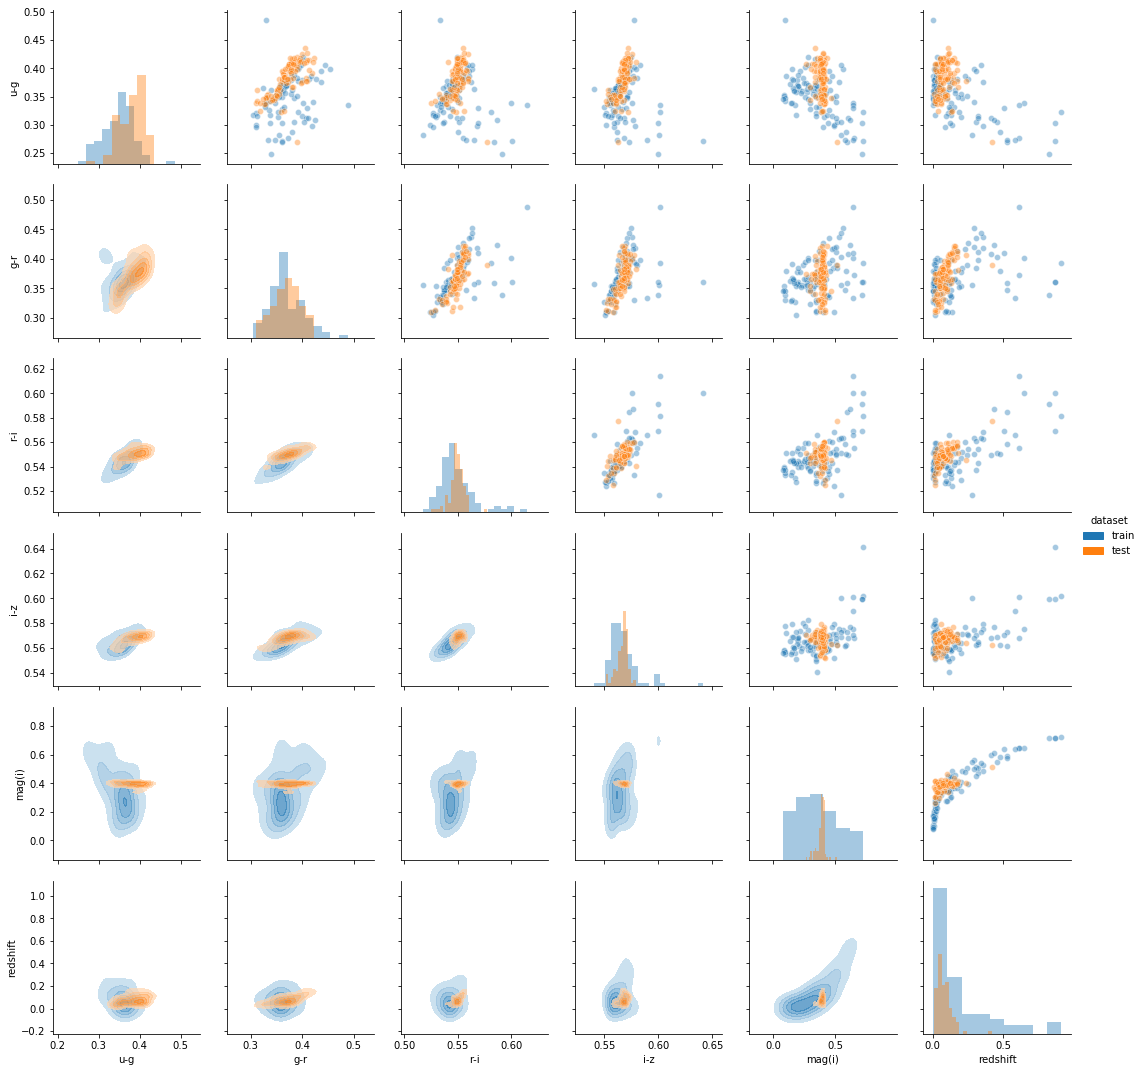

<Figure size 1139.38x1080 with 0 Axes>

In [15]:
from IPython.display import Image

g = sns.PairGrid(df_all, hue='dataset')
g = g.map_upper(sns.scatterplot, alpha=0.4)
g = g.map_lower(sns.kdeplot, n_levels=5, shade=True, shade_lowest=False, alpha=0.7)
# g = g.map_diag(sns.kdeplot, lw=2, shade=True)
g = g.map_diag(sns.distplot, hist=True, kde=False)
g = g.add_legend()

g.savefig("pairplot_new.png")

plt.clf() # Clean parirplot figure from sns 
Image(filename='pairplot_new.png') # Show pairplot as image

In [57]:
# TestSDSS

# [-3.367 -6.9   -6.436 -8.265  8.169]
# [ 9.465  6.744  5.984  6.784 30.22 ]
# ====
# [0.194 0.    0.453 0.488 0.264]
# [0.902 0.722 0.712 0.686 0.739]

In [58]:
# TestSynth

# [-3.367 -2.71  -6.436 -8.265  8.169]
# [ 9.465  6.744  5.943  6.784 30.22 ]
# ====
# [0.197 0.201 0.471 0.493 0.052]
# [0.456 0.561 0.665 0.687 0.758]

In [59]:
print(tf.__version__)

1.14.0


In [60]:
def evaluate(tensors):
    """Evaluates Tensor or EagerTensor to Numpy `ndarray`s.
    Args:
    tensors: Object of `Tensor` or EagerTensor`s; can be `list`, `tuple`,
      `namedtuple` or combinations thereof.

    Returns:
      ndarrays: Object with same structure as `tensors` except with `Tensor` or
        `EagerTensor`s replaced by Numpy `ndarray`s.
    """
    if tf.executing_eagerly():
        return tf.contrib.framework.nest.pack_sequence_as(
            tensors,
            [t.numpy() if tf.contrib.framework.is_tensor(t) else t
             for t in tf.contrib.framework.nest.flatten(tensors)])
    return sess.run(tensors)


def neural_network_mod():
    """
    loc, scale, logits = NN(x; theta)

    Args:
      X: Input Tensor containing input data for the MDN
    Returns:
      locs: The means of the normal distributions that our data is divided into.
      scales: The scales of the normal distributions that our data is divided
        into.
      logits: The probabilities of ou categorical distribution that decides
        which normal distribution our data points most probably belong to.
    """
    X = tf.placeholder(tf.float64,name='X',shape=(None,D))
    # 2 hidden layers with 15 hidden units
    net = tf.layers.dense(X, 32, activation=tf.nn.relu)
    net = tf.layers.dense(net, 16, activation=tf.nn.relu)
    net = tf.layers.dense(net, 8, activation=tf.nn.relu)
    locs = tf.layers.dense(net, K, activation=None)
    scales = tf.layers.dense(net, K, activation=tf.exp)
    logits = tf.layers.dense(net, K, activation=None)
    outdict= {'locs':locs, 'scales':scales, 'logits':logits}
    hub.add_signature(inputs=X,outputs=outdict)

    return locs, scales, logits


def mixture_model(X,Y,learning_rate=1e-3,decay_rate=.95,step=1000,train=True):
    if train:
        dict = neural_network(tf.convert_to_tensor(X),as_dict=True)
    else:
        dict = neural_network_t(tf.convert_to_tensor(X),as_dict=True)
    locs = dict['locs'] ; scales = dict['scales'] ; logits = dict['logits']
    cat = tfd.Categorical(logits=logits)
    components = [tfd.Normal(loc=loc, scale=scale) for loc, scale
                  in zip(tf.unstack(tf.transpose(locs)),
                         tf.unstack(tf.transpose(scales)))]

    y = tfd.Mixture(cat=cat, components=components)
    #define loss function
    log_likelihood = y.log_prob(Y)
    # log_likelihood = -tf.reduce_sum(log_likelihood/(1. + y_train)**2 )
    y_mean = np.median(Y)
    log_likelihood = -tf.reduce_sum(log_likelihood)
    #log_likelihood = -tf.reduce_sum(log_likelihood*(y_mean-y_train)**4 )
    if train:
        global_step = tf.Variable(0, trainable=False)
        decayed_lr = tf.train.exponential_decay(learning_rate,
                                        global_step, step,
                                        decay_rate, staircase=True)
        optimizer = tf.train.AdamOptimizer(decayed_lr)
        train_op = optimizer.minimize(log_likelihood)
        evaluate(tf.global_variables_initializer())
        return log_likelihood, train_op, logits, locs, scales
    else:
        evaluate(tf.global_variables_initializer())
        return log_likelihood, logits, locs, scales

def train(log_likelihood,train_op,n_epoch):
    train_loss = np.zeros(n_epoch)
    test_loss = np.zeros(n_epoch)
    for i in range(n_epoch):
        _, loss_value = evaluate([train_op, log_likelihood])
        train_loss[i] = loss_value
    plt.plot(np.arange(n_epoch), -train_loss / len(X_train), label='Train Loss')
    # plt.savefig('../Plots/T_loss_function.pdf')
    return train_loss

def get_predictions(logits,locs,scales):
    pred_weights, pred_means, pred_std = evaluate([tf.nn.softmax(logits), locs, scales])
    return pred_weights, pred_means, pred_std

def testing(X_test,y_test):

    log_likelihood,  logits, locs, scales = mixture_model(X_test,y_test,train=False)
    #_, loss_value = evaluate([train_op, log_likelihood])
    pred_weights, pred_means, pred_std = get_predictions(logits,locs,scales)
    return pred_weights, pred_means, pred_std

In [61]:
def plot_normal_mix(pis, mus, sigmas, ax, label='', comp=True):
  """Plots the mixture of Normal models to axis=ax comp=True plots all
  components of mixture model
  """
  # x = np.linspace(-10.5, 10.5, 250)
  x = np.linspace(-0.1, 1.1, 250)
  final = np.zeros_like(x)
  for i, (weight_mix, mu_mix, sigma_mix) in enumerate(zip(pis, mus, sigmas)):
    temp = stats.norm.pdf(x, mu_mix, sigma_mix) * weight_mix
    final = final + temp
    if comp:
      ax.plot(x, temp, label='Normal ' + str(i), alpha =0.3)
  ax.plot(x, final, label='Mixture of Normals ' + label)
  ax.legend(fontsize=13)
  return final

def plot_pdfs(pred_means,pred_weights,pred_std, y,num=4, train=True):
    np.random.seed(12)
#     np.random.seed(12)

#     if train:
#         obj = [random.randint(0,num_train-1) for x in range(num)]
#     else:
#         obj = [random.randint(0,num_test-1) for x in range(num)]
#     #obj = [93, 402, 120,789,231,4,985]
    if train:
        obj = np.random.randint(0,num_train-1,num)
    else:
        obj = np.random.randint(0,num_test-1,num)
    #obj = [93, 402, 120,789,231,4,985]
    
    print(obj)
#     fig, axes = plt.subplots(nrows=num, ncols=1, sharex = True, figsize=(8, 7), num='PDFs')
    allfs = []
    for i in range(len(obj)):
        fs = plot_normal_mix(pred_weights[obj][i], pred_means[obj][i],
                    pred_std[obj][i], axes[i], comp=False)
        allfs.append(fs)
        axes[i].axvline(x=y[obj][i], color='black', alpha=0.5)
#         axes[i].text(0.3, 4.0, 'ID: ' +str(obj[i]), horizontalalignment='center', verticalalignment='center')

#     plt.xlabel(r' rescaled[$z_{pred}]$', fontsize = 19)
    plt.xlabel(r'$z_{\rm pred}]$', fontsize = 22)
    plt.ylabel('$PDF$', fontsize = 22)


    # plt.savefig('../Plots/T_pdfs.pdf')
#     plt.show()

def plot_pred_mean(pred_means,pred_weights,pred_std,ymax,ymin,y,select='no'):
    y_pred = np.sum(pred_means*pred_weights, axis = 1)
    y_pred_std = np.sum(pred_std*pred_weights, axis = 1)

    plt.figure(22, figsize=(9,8))

    #ymax=1
    #ymin=0
    # if select == 'yes':
    #     y_pred = y_pred[obj]
    #     y_train = y_train[obj]
    #     y_pred_std = y_pred_std[obj]

    # plt.scatter(y_test, y_pred, facecolors='k', s = 1)

    # plt.errorbar( (ymax - ymin)*(y_train)+ymin, (ymax - ymin)*(y_pred)+ymin, yerr= (ymax - ymin)*(y_pred_std), fmt='bo', ecolor='r', ms = 2, alpha = 0.1)
    plt.errorbar( (ymax - ymin)*(y)+ymin, (ymax - ymin)*(y_pred)+ymin, yerr= (ymax - ymin)*(y_pred_std), fmt='o', ms = 2, alpha = 0.1)

    #switched
    #plt.errorbar(  (ymax - ymin)*(y_pred)+ymin, (ymax - ymin)*(y_train)+ymin, yerr= (ymax - ymin)*(y_pred_std), fmt='bo', ecolor='r', ms = 2, alpha = 0.1)

    #plt.text(0.2, 0.9, train_datafile + ' trained', horizontalalignment='center', verticalalignment='center')
    plt.plot((ymax - ymin)*(y)+ymin, (ymax - ymin)*( y)+ymin, 'k')

    plt.ylabel(r'$z_{pred}$', fontsize = 19)
    plt.xlabel(r'$z_{true}$', fontsize = 19)
    #plt.xlim([0,1])
    #plt.ylim([0,1])
    plt.title('weight x mean')
    plt.tight_layout()
    # plt.savefig('../Plots/T_pred_mean.pdf')
#     plt.show()

def plot_pred_peak(pred_means,pred_weights,pred_std,ymax,ymin,y,select='no'):
    def peak(weight,sigma):
        return weight/np.sqrt(2*np.pi*sigma**2)

    peak_max = np.argmax(peak(pred_weights,pred_std),axis=1)
    y_pred = np.array([pred_means[i,peak_max[i]] for i in range(len(y))])
    y_pred_std = np.array([pred_std[i,peak_max[i]] for i in range(len(y))])
    plt.figure(24, figsize=(9, 8))
    # if select == 'yes':
    #     y_pred = y_pred[obj]
    #     y_train = y_train[obj]
    #     y_pred_std = y_pred_std[obj]
    # plt.scatter(y_test, y_pred, facecolors='k', s = 1)
    # plt.errorbar((ymax - ymin)*(y_train)+ymin, (ymax - ymin)*(y_pred)+ymin, yerr= (ymax - ymin)*(
    #   y_pred_std), fmt='bo', ecolor='r', ms = 2, alpha = 0.1)

    plt.errorbar((ymax - ymin)*(y)+ymin, (ymax - ymin)*(y_pred)+ymin, yerr= (ymax - ymin)*(
      y_pred_std), fmt='o', ms = 2, alpha = 0.1)


    #plt.text(0.2, 0.9, train_datafile + ' trained', horizontalalignment='center', verticalalignment='center')
    plt.plot((ymax - ymin)*(y_test)+ymin, (ymax - ymin)*(y_test)+ymin, 'k')
    plt.ylabel(r'$z_{pred}$', fontsize = 19)
    plt.xlabel(r'$z_{true}$', fontsize = 19)
    #plt.xlim([0,1])
    #plt.ylim([0,1])
    plt.title('highest peak')
    plt.tight_layout()
#     plt.show()

def plot_pred_weight(pred_means,pred_weights,pred_std,ymax,ymin,y,select='no'):
    weight_max = np.argmax(pred_weights, axis = 1)  ## argmax or max???

    y_pred = np.array([pred_means[i,weight_max[i]] for i in range(len(y))])
    y_pred_std = np.array([pred_std[i,weight_max[i]] for i in range(len(y))])

    plt.figure(29, figsize=(9, 8))
    # if select == 'yes':
    #     y_pred = y_pred[obj]
    #     y_train = y_train[obj]
    #     y_pred_std = y_pred_std[obj]

    # plt.scatter(y_test, y_pred, facecolors='k', s = 1)
    # plt.errorbar((ymax - ymin)*(y_train)+ymin, (ymax - ymin)*(y_pred)+ymin, yerr= (ymax - ymin)*(
    #   y_pred_std), fmt='bo', ecolor='r', ms = 2, alpha = 0.1)

    plt.errorbar((ymax - ymin)*(y)+ymin, (ymax - ymin)*(y_pred)+ymin, yerr= (ymax - ymin)*(
      y_pred_std), fmt='o', ms = 2, alpha = 0.1)

    #plt.text(0.2, 0.9, train_datafile + ' trained', horizontalalignment='center', verticalalignment='center')
    plt.plot((ymax - ymin)*(y_test)+ymin, (ymax - ymin)*(y_test)+ymin, 'k')
    plt.ylabel(r'$z_{pred}$', fontsize = 19)
    plt.xlabel(r'$z_{true}$', fontsize = 19)
    #plt.xlim([0,1])
    #plt.ylim([0,1])
    plt.title('highest weight')
    plt.tight_layout()
#     plt.show()


def per_stats(pred_means,pred_weights,pred_std,ymax,ymin,y):
    y_pred = np.sum(pred_means*pred_weights, axis = 1)
    y_pred_std = np.sum(pred_std*pred_weights, axis = 1)
    y_pred = (ymax - ymin)*(y_pred)+ymin
    y_pred_std = (ymax - ymin)*(y_pred_std)
    y = (ymax - ymin)*(y)+ymin
    diff = y_pred-y
    mean_diff = np.mean(diff)
    med_diff = np.median(diff)
    std_diff = np.std(diff)
    mean_sigma = np.mean(y_pred_std)
    med_sigma = np.median(y_pred_std)
    std_sigma = np.std(y_pred_std)
    return mean_diff, med_diff, std_diff, mean_sigma, med_sigma, std_sigma

def plot_cum_sigma(pred_weights,pred_std,ymax,ymin):
    #y_pred_std = np.sum(pred_std*pred_weights, axis = 1)

    weight_max = np.argmax(pred_weights, axis = 1)  ## argmax or max???
    y_pred_std = np.array( [pred_std[i,weight_max[i] ] for i in range(len(pred_weights[0]))])
    y_pred_std = (ymax - ymin)*(y_pred_std)
    plt.figure(222)
    plt.hist(y_pred_std,1000, density=True, histtype='step', cumulative=True)
    plt.xlabel('Sigma')
#     plt.show()

In [62]:
# num_test = 1000
# D = 5 #6  # number of features  (8 for DES, 6 for COSMOS)

In [63]:
#########################################################

# n_epochs = 20000 #1000 #20000 #20000
# K = 3 
# learning_rate = 1e-4
# decay_rate= 0.01
# step=100
# num_train = 800000

# syntheticTrain = False 

# save_mod_2 = '../saved_hubs/'+'hub_mod_Synthetic_'+str(syntheticTrain)+'_lr_'+str(learning_rate)+'_dr'+str(decay_rate)+'_step'+str(step)+'_ne'+str(n_epochs)+'_k'+str(K)+'_nt'+str(num_train)


In [64]:
# np.random.seed(12345)

# n_epochs = 50000 #3030030 #000 #20000 #100000 #1000 #20000 #20000
# # N = 4000  # number of data points  -- replaced by num_trai
# D = 5 #6  # number of features  (8 for DES, 6 for COSMOS)
# K = 3 # number of mixture components


# learning_rate = 1e-3 #5e-3
# decay_rate= 0.01 #0.0
# step=1000


# num_train = 1100000 #2900000 #000#00 #800000 #12000000 #800000
# num_test = 500 #5000 #params.num_test # 32


# syntheticTrain = True # True # (sim_obs_combine) True -- train using GalaxyPy, False -- train using

# save_mod_2 = '../saved_hubs/'+'sdss_colmagUM_synthetic_'+str(syntheticTrain)+'_lr_'+str(learning_rate)+'_dr'+str(decay_rate)+'_step'+str(step)+'_ne'+str(n_epochs)+'_k'+str(K)+'_nt'+str(num_train)



In [65]:
n_epochs = 400000 #3030030 #000 #20000 #100000 #1000 #20000 #20000
# N = 4000  # number of data points  -- replaced by num_trai
D = 5 #6  # number of features  (8 for DES, 6 for COSMOS)
K = 3 # number of mixture components


learning_rate = 1e-3
decay_rate= 0.01 #0.0
step=1000


num_train = 1100000 #2900000 #000#00 #800000 #12000000 #800000
num_test = 1000 #5000 #params.num_test # 32


syntheticTrain = True # True # (sim_obs_combine) True -- train using GalaxyPy, False -- train using

save_mod_2 = '../saved_hubs/'+'sdss_colmagUM_synthetic_'+str(syntheticTrain)+'_lr_'+str(learning_rate)+'_dr'+str(decay_rate)+'_step'+str(step)+'_ne'+str(n_epochs)+'_k'+str(K)+'_nt'+str(num_train)


In [66]:
# n_epochs = 130 #000 #20000 #100000 #1000 #20000 #20000
# # N = 4000  # number of data points  -- replaced by num_trai
# D = 5 #6  # number of features  (8 for DES, 6 for COSMOS)
# K = 3 # number of mixture components


# learning_rate = 1e-3 #5e-3
# decay_rate= 0.01 #0.0
# step=1000


# num_train = 2900000 #000#00 #800000 #12000000 #800000
# # num_test = 500 #5000 #params.num_test # 32


# syntheticTrain = True # True # (sim_obs_combine) True -- train using GalaxyPy, False -- train using

# save_mod_2 = '../saved_hubs/'+'sdss_colmagUM_synthetic_'+str(syntheticTrain)+'_lr_'+str(learning_rate)+'_dr'+str(decay_rate)+'_step'+str(step)+'_ne'+str(n_epochs)+'_k'+str(K)+'_nt'+str(num_train)


In [67]:
#########################################################

# n_epochs = 100010 #1000 #20000 #20000
# K = 3 
# learning_rate = 0.005 #e-4
# decay_rate= 0.0
# step=100
# num_train = 800000

# syntheticTrain = False 

# save_mod_2 = '../saved_hubs/'+'hub_mod_Synthetic_'+str(syntheticTrain)+'_lr_'+str(learning_rate)+'_dr'+str(decay_rate)+'_step'+str(step)+'_ne'+str(n_epochs)+'_k'+str(K)+'_nt'+str(num_train)


In [68]:
n_epochs = 40000 #3030030 #000 #20000 #100000 #1000 #20000 #20000
# N = 4000  # number of data points  -- replaced by num_trai
D = 5 #6  # number of features  (8 for DES, 6 for COSMOS)
K = 3 # number of mixture components


learning_rate = 1e-3
decay_rate= 0.01 #0.0
step=1000


num_train = 1000000 #2900000 #000#00 #800000 #12000000 #800000
num_test = 1000 #5000 #params.num_test # 32


syntheticTrain = True # True # (sim_obs_combine) True -- train using GalaxyPy, False -- train using

save_mod = '../saved_hubs/'+'sdss_colmagUM_synthetic_'+str(syntheticTrain)+'_lr_'+str(learning_rate)+'_dr'+str(decay_rate)+'_step'+str(step)+'_ne'+str(n_epochs)+'_k'+str(K)+'_nt'+str(num_train)



In [69]:
save_mod# --- synthetic 1 mil run

'../saved_hubs/sdss_colmagUM_synthetic_True_lr_0.001_dr0.01_step1000_ne40000_k3_nt1000000'

In [70]:
save_mod_2

'../saved_hubs/sdss_colmagUM_synthetic_True_lr_0.001_dr0.01_step1000_ne400000_k3_nt1100000'

In [145]:
############ loading data ############

# _, _, X_test, y_test, ymax, ymin, xmax, xmin = ReadGalaxPy(path_program = '../../../Data/fromGalaxev/photozs/datasets/', sim_obs_combine = True)
# num_train = 100000
_, _, X_test, y_test, ymax, ymin, xmax, xmin = ReadCosmosDraw_UM(path_program = '../../../Data/fromGalaxev/photozs/datasets/')

# print("Size of features in training data: {}".format(X_train.shape))
# print("Size of output in training data: {}".format(y_train.shape))
print("Size of features in test data: {}".format(X_test.shape))
print("Size of output in test data: {}".format(y_test.shape))

Train files shape (29066, 100, 5)
(11333, 100, 5)
Train files shape (with z) (1133300, 6)
Size of features in test data: (1000, 5)
Size of output in test data: (1000,)


In [146]:
print(xmax, xmin, ymax, ymin)

[ 9.4646943   6.74403564  5.94323601  6.78430723 30.21977367] [-3.36668259 -2.70990778 -6.43640504 -8.22507198  8.16904146] 1.25 0.005602959077805281


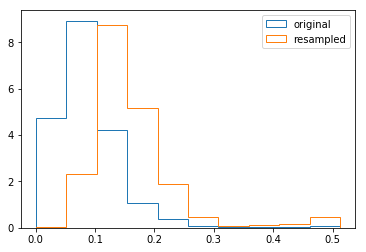

In [148]:
resampleTest = True

if resampleTest == True:
    test_argsort = np.argsort(y_test)
    y_test = y_test[test_argsort]
    X_test = X_test[test_argsort]

    num_y_test_select = 1000
    exp_dist = np.random.exponential(scale=0.01, size=num_test)
    # exp_dist = np.random.geometric(p=0.1, size=num_test)
    trunc_dist = num_test*(1-exp_dist/(exp_dist.max() - exp_dist.min()) )
    int_dist = trunc_dist.astype('int')
    int_select = int_dist[:num_y_test_select]


    plt.figure(23)
    plt.hist(y_test, normed=True, histtype='step', label='original')


    y_test1 = y_test[int_select]
    X_test1 = X_test[int_select]


    plt.hist(y_test1, normed=True, histtype='step', label='resampled')
    plt.legend()
    plt.show()



In [149]:
# reSampleTest = True
# if reSampleTest :
#     # test_argsort = np.argsort(y_test)
#     # y_test = y_test[test_argsort]
#     # X_test = X_test[test_argsort]

#     num_y_test_select_per_bin = 20
#     n_bins = 30
#     np.random.seed(1)

#     bins = np.linspace(y_test.min(), y_test.max(), n_bins)
#     # bins = np.logspace(np.log10(y_test.min()+1e-2), np.log10(y_test.max()+1e-2), n_bins)
#     inds = np.digitize(y_test, bins)

#     # print(bins)
#     # print(inds.shape, inds.max())
#     # hist_y = np.histogram(y_test, bins = bins)
#     # plt.plot(inds)
#     # plt.plot(hist_y[0], '-.')
#     # plt.yscale('log')

#     resampled_ind = []

#     for ind_i in range(n_bins):
#         ind_bin = np.where(inds==ind_i)
#         random_choices = np.min( [num_y_test_select_per_bin, np.size(ind_bin) ])
#         index = np.random.choice(ind_bin[0], random_choices, replace=False)
#         resampled_ind = np.append(resampled_ind, index)

#     resampled_ind = resampled_ind.astype('int')


#     plt.figure(23)
#     plt.hist(y_test, normed=True, bins = 50, histtype='step', label='original')
#     y_test1 = y_test[resampled_ind]
#     X_test1 = X_test[resampled_ind]

#     plt.hist(y_test1, normed=True, bins = 50, histtype='step', label='resampled')
#     plt.legend()
#     plt.show()

#     # print(int_select)




In [150]:
if reSampleTest :
    y_test = y_test1
    X_test = X_test1

In [151]:
#### MODEL 1 ####

##load network
neural_network_t = hub.Module(save_mod)

##testing
test_weights, test_means, test_std = testing(X_test,y_test)

##plotting
plot_pred_mean(test_means,test_weights,test_std,ymax,ymin,y_test)
test_mean_diff, test_med_diff, test_std_diff, test_mean_sigma, test_med_sigma, test_std_sigma = per_stats(test_means,test_weights,test_std,ymax,ymin,y_test)
plot_pred_peak(test_means,test_weights,test_std,ymax,ymin,y_test)
plot_pred_weight(test_means,test_weights,test_std,ymax,ymin,y_test)
plot_cum_sigma(test_weights,test_std,ymax,ymin)


##### MODEL 2 ####

##load network
neural_network_t = hub.Module(save_mod_2)

##testing
test_weights_2, test_means_2, test_std_2 = testing(X_test,y_test)

##plotting
plot_pred_mean(test_means_2,test_weights_2,test_std_2,ymax,ymin,y_test)
test_mean_diff_2, test_med_diff_2, test_std_diff_2, test_mean_sigma_2, test_med_sigma_2, test_std_sigma_2 = per_stats(test_means_2,test_weights_2,test_std_2,ymax,ymin,y_test)
plot_pred_peak(test_means_2,test_weights_2,test_std_2,ymax,ymin,y_test)
plot_pred_weight(test_means_2,test_weights_2,test_std_2,ymax,ymin,y_test)
plot_cum_sigma(test_weights_2,test_std_2,ymax,ymin)

## plotting pdfs
nrows = 3
fig, axes = plt.subplots(nrows=nrows, ncols=1, sharex = True, figsize=(9, nrows*3), num='pdfs')
plot_pdfs(test_means,test_weights,test_std, y_test, num=nrows, train=False)
plot_pdfs(test_means_2,test_weights_2,test_std_2, y_test, num=nrows, train=False)



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
[462, 18, 81]
0
1
2
[462, 18, 81]
0
1
No handles with labels found to put in legend.
No handles with labels found to put in legend.
2
Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x10e66fcb0> (for post_execute):


ValueError: Invalid RGBA argument: ''

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
[462, 18, 81]
0
1
2
[462, 18, 81]
0
1
2


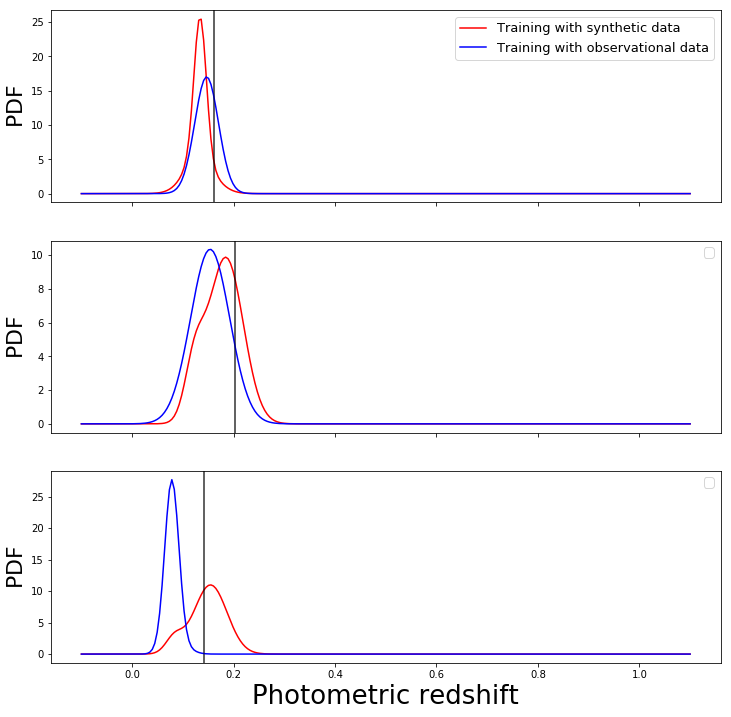

In [156]:
def plot_normal_mix(pis, mus, sigmas, ax, label='', color = '', comp=True):
  """Plots the mixture of Normal models to axis=ax comp=True plots all
  components of mixture model
  """

  x = np.linspace(-0.1, 1.1, 250)
  final = np.zeros_like(x)
  for i, (weight_mix, mu_mix, sigma_mix) in enumerate(zip(pis, mus, sigmas)):
    temp = stats.norm.pdf(x, mu_mix, sigma_mix) * weight_mix
    final = final + temp
    if comp:
#       ax.plot(x, temp, label='Normal ' + str(i), alpha =0.6)
      ax.plot(x, temp, 'k--', alpha =0.9)

#       ax.plot(x, temp/final.max(), alpha =0.5)

  ax.plot(x, final,label=label, color = color)
#   ax.plot(x, final/final.max(), label=label, color = color)

    
  ax.legend(fontsize=13)
  return final

def plot_pdfs(pred_means,pred_weights,pred_std, y,num=4, label = '', color = '', train=False, comp = False):
    np.random.seed(12)

    if train:
        obj = np.random.randint(0,num_train-1,num)
    else:
        obj = np.random.randint(0,num_test-1,num)
#     obj = [462, 667, 81]
#     obj = [462, 102, 81]
    obj = [462, 18, 81]
    
    print(obj)

    allfs = []
    for i in range(len(obj)):
        print(i)
        if (i==0):
            fs = plot_normal_mix(pred_weights[obj][i], pred_means[obj][i], pred_std[obj][i], axes[i], label = label, color = color, comp=comp)
        else: fs = plot_normal_mix(pred_weights[obj][i], pred_means[obj][i], pred_std[obj][i], axes[i], label = '', color = color, comp=comp)

        axes[i].set_ylabel(r'${\rm PDF}$', fontsize = 22)
        allfs.append(fs)
        axes[i].axvline(x=y[obj][i], color='black', alpha=0.5)
        

    plt.xlabel('Photometric redshift', fontsize = 26)
    




## plotting pdfs
nrows = 3
fig, axes = plt.subplots(nrows=nrows, ncols=1, sharex = True, figsize=(12, nrows*4), num='pdfs')
plot_pdfs(test_means,test_weights,test_std, y_test, num=nrows, label = 'Training with synthetic data', color = 'red', train=False)
plot_pdfs(test_means_2,test_weights_2,test_std_2, y_test, num=nrows, label = 'Training with observational data', color = 'blue', train=False)

In [157]:
y_test2 = y_test ### CHECK THIS AGAIN -- THERE MAY BE ISSUES WITH MIXING TRAINING AND TESTING SETS
ymax2 = ymax
ymin2 = ymin


#### choosing y_pred here -- may not be a good choice
#### cumulative --> y_pred

y_pred = np.sum(test_means*test_weights, axis = 1)
y_pred_std = np.sum(test_std*test_weights, axis = 1)

y_pred_2 = np.sum(test_means_2*test_weights_2, axis = 1)
y_pred_std_2 = np.sum(test_std_2*test_weights_2, axis = 1)


# #### highest weight --> y_pred

# weight_max = np.argmax(test_weights, axis = 1) 

# y_pred = np.array([test_means[i,weight_max[i]] for i in range(len(y_test))])
# y_pred_std = np.array([test_std[i,weight_max[i]] for i in range(len(y_test))])



# weight_max_2 = np.argmax(test_weights_2, axis = 1) 

# y_pred_2 = np.array([test_means_2[i,weight_max_2[i]] for i in range(len(y_test2))])
# y_pred_std_2 = np.array([test_std_2[i,weight_max_2[i]] for i in range(len(y_test2))])


### highest peak --> y_pred

# def peak(weight,sigma):
#     return weight/np.sqrt(2*np.pi*sigma**2)

# peak_max = np.argmax(peak(test_weights,test_std),axis=1)
# y_pred = np.array([test_means[i,peak_max[i]] for i in range(len(y_test))])
# y_pred_std = np.array([test_std[i,peak_max[i]] for i in range(len(y_test))])

# peak_max_2 = np.argmax(peak(test_weights_2,test_std_2),axis=1)
# y_pred_2 = np.array([test_means_2[i,peak_max_2[i]] for i in range(len(y_test2))])
# y_pred_std_2 = np.array([test_std_2[i,peak_max_2[i]] for i in range(len(y_test2))])

In [158]:
def sigmaNMAD(z_spec, z_pho):
    return 1.48*np.median( np.abs( z_pho - z_spec)/(1 + z_spec))
    # else: return 1.48*np.median( np.abs( z_pho - z_spec)/(1 + z_spec),)



def outlierFrac(z_spec, z_pho, threshold = 0.15):
    outliers = z_pho[ (np.abs(z_spec - z_pho)) >= threshold*z_spec ]
    return 100.0*len(outliers)/np.shape(z_pho)[0]


sigmaNMAD_obs_all =  sigmaNMAD( (ymax2 - ymin2)*(ymin2 + y_test2), (ymax2 - ymin2)*(ymin2 + y_pred_2) )

sigmaNMAD_combine_all =  sigmaNMAD( (ymax - ymin)*(ymin + y_test), (ymax - ymin)*(ymin + y_pred) )


print( 'sigmaNMAD_combine_all ', sigmaNMAD_combine_all  ) ## combine
print( 'sigmaNMAD_obs_all', sigmaNMAD_obs_all ) # obs only


outFr_obs_all = outlierFrac( (ymax2 - ymin2)*(ymin2 + y_test2), (ymax2 - ymin2)*(ymin2 + y_pred_2), 0.15 )

outFr_combine_all =  outlierFrac( (ymax - ymin)*(ymin + y_test), (ymax - ymin)*(ymin + y_pred) , 0.15)


print( 'outFr_combine_all ', outFr_combine_all  ) ## combine
print( 'outFr_obs_all', outFr_obs_all ) # obs only


sigmaNMAD_obs_all =  sigmaNMAD( (ymax2 - ymin2)*(ymin2 + y_test2), (ymax2 - ymin2)*(ymin2 +
                                                                                      y_pred_2) )

sigmaNMAD_combine_all =  sigmaNMAD( (ymax - ymin)*(ymin + y_test), (ymax - ymin)*(ymin +
                                                                                      y_pred) )


print( 'sigmaNMAD_combine_all ', sigmaNMAD_combine_all  ) #
# combine
print( 'sigmaNMAD_obs_all', sigmaNMAD_obs_all ) # obs only
####################### model 2 ends ###########################



sigmaNMAD_combine_all  0.048026757226039905
sigmaNMAD_obs_all 0.05599963070382683
outFr_combine_all  59.5
outFr_obs_all 72.4
sigmaNMAD_combine_all  0.048026757226039905
sigmaNMAD_obs_all 0.05599963070382683


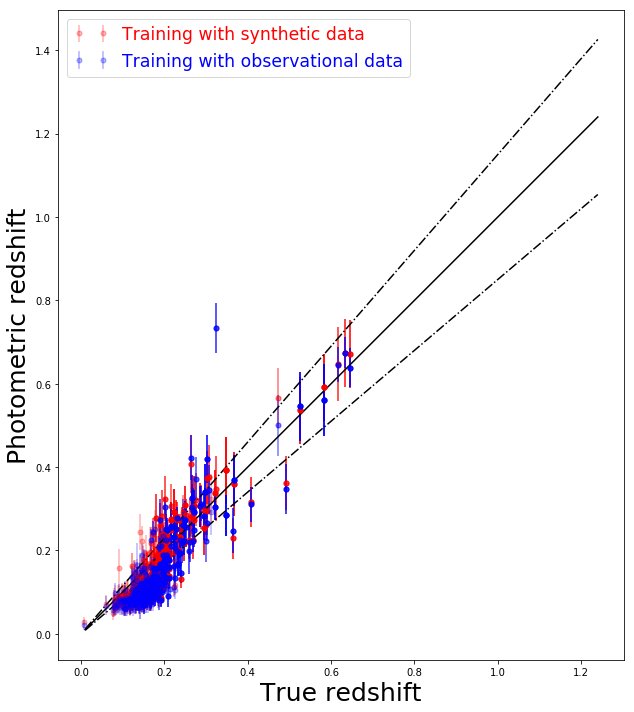

In [159]:
# fig = plt.figure(22)


## Overall mean --- weight * mean
ifPlotWeighted = True

if ifPlotWeighted:
    plt.figure(22, figsize=(10, 10))

#     y_pred = np.sum(pred_means_new*pred_weights_new, axis = 1)
#     y_pred_std_new = np.sum(pred_std_new*pred_weights_new, axis = 1)

    # # plt.scatter(y_test, y_pred, facecolors='k', s = 1)
#     plt.errorbar((ymax - ymin)*(ymin + y_test), (ymax - ymin)*(ymin + y_pred), yerr= (ymax - ymin)*(
#       ymin + y_pred_std_new), fmt='bo', ecolor='r', ms = 2, alpha = 0.1)
    
    plt.errorbar((ymax - ymin)*(ymin + y_test), (ymax - ymin)*(ymin + y_pred), yerr= (ymax - ymin)*(
      ymin + y_pred_std), fmt='ro', ecolor='r', ms = 5, alpha = 0.3, label = 'Training with synthetic data')

#     plt.errorbar((ymax - ymin)*(ymin + y_test), (ymax - ymin)*(ymin + y_pred), yerr= (ymax - ymin)*(
#       ymin + y_pred_std), fmt='wo', ecolor='w', ms = 5, alpha = 0.8, label = 'Training with synthetic data')



    # plt.text(0.8, 2.0, datafile, horizontalalignment='center', verticalalignment='center')
    # plt.ylabel(r'$z_{pred}$', fontsize = 19)
    # plt.xlabel(r'$z_{true}$', fontsize = 19)

    # plt.title('weight x mean')
    # plt.tight_layout()
    # plt.show()



## Overall mean --- weight * mean
# ifPlotWeighted = True


if ifPlotWeighted:

#     y_pred_new2 = np.sum(pred_means_new2*pred_weights_new2, axis = 1)
#     y_pred_std_new2 = np.sum(pred_std_new2*pred_weights_new2, axis = 1)

#     plt.figure(22, figsize=(6,6))


    # plt.scatter(y_test2, y_pred, facecolors='k', s = 1)
#     plt.errorbar((ymax2 - ymin2)*(ymin2 + y_test2), (ymax2 - ymin2)*(ymin2 + y_pred), yerr= (ymax2 - ymin2)*(
#       ymin2 + y_pred_std_new2), fmt='bo', ecolor='r', ms = 2, alpha = 0.1)
    
    plt.errorbar((ymax2 - ymin2)*(ymin2 + y_test2), (ymax2 - ymin2)*(ymin2 + y_pred_2), yerr= (ymax2 - ymin2)*(
      ymin2 + y_pred_std_2), fmt='bo', ecolor='b', ms = 5, alpha = 0.3, label = 'Training with observational data')

#     plt.errorbar((ymax2 - ymin2)*(ymin2 + y_test2), (ymax2 - ymin2)*(ymin2 + y_pred_2), yerr= (ymax2 - ymin2)*(
#       ymin2 + y_pred_std_2), fmt='co', ecolor='c', ms = 5, alpha = 0.8, label = 'Training with observational data')



    # plt.text(0.8, 2.0, datafile, horizontalalignment='center', verticalalignment='center')

# plt.xlim(0, 1)
# plt.ylim(0, 1)

# # plt.text(0.1, 0.9, r'$\sigma_{NMAD}$ = %.3f'%sigmaNMAD_obs_all, color = 'red' , size = 20)
# # plt.text(0.1, 0.85, r'$\sigma_{NMAD}$ = %.3f'%sigmaNMAD_combine_all, color = 'blue' , size = 20)
# plt.text(0.6, 0.2, r'$\sigma_{NMAD}$ = %.3f'%sigmaNMAD_obs_all, color = 'blue' , size = 20)
# plt.text(0.6, 0.1, r'$\sigma_{NMAD}$ = %.3f'%sigmaNMAD_combine_all, color = 'red' , size = 20)

# plt.text(0.1, 0.9, r'GalaxPy training', color = 'red' , size = 20)
# plt.text(0.1, 0.85, r'SDSS training', color = 'blue' , size = 20)


line_limits = np.arange(1e-2, 1.25, 0.01)
plt.plot( line_limits, line_limits, 'k')
plt.plot( line_limits, 0.85*np.array(line_limits), 'k-.')
plt.plot( line_limits, 1.15*np.array(line_limits), 'k-.')

# plt.ylabel(r'$z_{\rm phot}$', fontsize=30)
# plt.xlabel(r'$z_{\rm spec}$', fontsize=30)
# plt.xscale('log')
# plt.yscale('log')

plt.ylabel(r'Photometric redshift', fontsize=25)
plt.xlabel(r'True redshift', fontsize=25)
# plt.xlim(0.0, 1)
# plt.ylim(0.0, 1)

plt.legend(fontsize = 'large', markerscale=3., numpoints=3)
# plt.title('weight x mean')
plt.tight_layout()

plt.axes().set_aspect('equal')



leg = plt.legend(fontsize = 'xx-large', markerscale=1., numpoints=2)

for artist, text in zip(leg.legendHandles, leg.get_texts()):
    col = artist.get_color()
    if isinstance(col, np.ndarray):
        col = col[0]
    text.set_color(col)
    text.set_alpha(1.0)


plt.savefig('phoz_compare.pdf', bbox_inches='tight')

plt.show()


In [ ]:
plt.figure(472, figsize = (16, 10))
nbins = 50
plt.hist((ymax - ymin)*(ymin + y_test), bins = nbins,  label = 'Observed distribution', color='k', histtype='stepfilled', alpha = 0.2, lw = 2, normed= True)
plt.hist((ymax - ymin)*(ymin + y_pred), bins = nbins,  label = 'Training with synthetic data', color = 'r', histtype='stepfilled', lw = 2, alpha = 0.2, normed= True)
plt.hist((ymax2 - ymin2)*(ymin2 + y_pred_2), bins = nbins,  label = 'Training with observational data', color = 'b', histtype='stepfilled', lw = 2, alpha = 0.2, normed= True)
plt.legend( fontsize = 24)
plt.show()

In [ ]:
import pandas as pd
s = pd.Series((ymax - ymin)*(ymin + y_test)).add_prefix('Observed distribution')
s1 = pd.Series((ymax - ymin)*(ymin + y_pred)).add_prefix('Training with synthetic data')
s2 = pd.Series((ymax2 - ymin2)*(ymin2 + y_pred_2)).add_prefix('Training with observational data')

plt.figure(12, figsize = (12, 8))

ax = s.plot.hist(alpha=0.15, density=10, label = 'Observed distribution')
ax = s.plot.kde(linewidth = 2, secondary_y=True, label = 'KDE fit - Observed distribution')
ax = s1.plot.hist(alpha=0.15, density=10, label = 'Training with synthetic data')
ax = s1.plot.kde(linewidth = 2,  secondary_y=True, linestyle = '--', label = 'KDE fit - Training with synthetic data')
ax = s2.plot.hist(alpha=0.15, density=10, label = 'Training with observational data')
ax = s2.plot.kde(linewidth = 2, secondary_y=True, linestyle = '--', label = 'KDE fit - Training with observational data')

plt.legend(fontsize = 18)
plt.xlabel('log(z)', fontsize = 24)
plt.ylabel('n(z)',fontsize = 24)
plt.xscale('log')

plt.show()

In [ ]:
# np.histogram((ymax - ymin)*(ymin + y_test), bins = 50)[1]

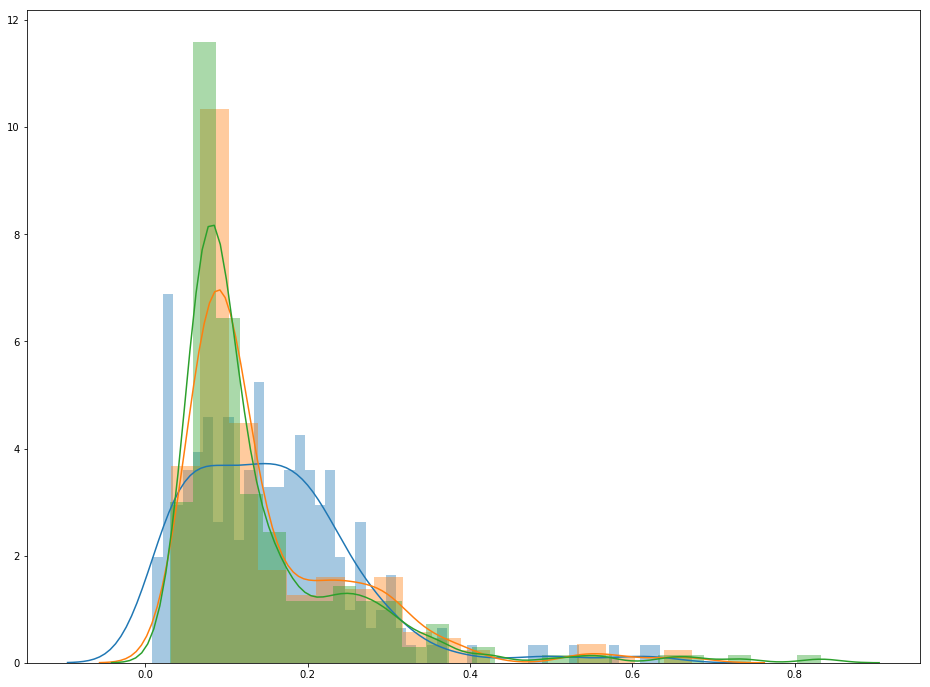

In [122]:
import seaborn as sns
plt.figure(143, figsize = (16, 12))
sns.distplot(s, bins = 50)
sns.distplot(s1)
sns.distplot(s2)



In [123]:
def sigmaNMAD(z_spec, z_pho):
    return 1.48*np.median( np.abs( z_pho - z_spec)/(1 + z_spec))
    # else: return 1.48*np.median( np.abs( z_pho - z_spec)/(1 + z_spec),)

def outlierFrac(z_spec, z_pho, threshold = 0.15):
    outliers = z_pho[ (np.abs(z_spec - z_pho)) >= threshold*z_spec ]
    return 100.0*len(outliers)/np.shape(z_pho)[0]

def MedianProperScore(z_spec, mu_all, sigma_all):
    ## Eq 27 in https://www.tandfonline.com/doi/pdf/10.1198/016214506000001437?needAccess=true
    ## taking median of all scores
    S_all = np.zeros_like(mu_all)
    for comp_i in range(S_all.shape[1]):
        S_all[:, comp_i] = - ((z_spec - mu_all[:, comp_i])/sigma_all[:, comp_i])**2 - np.log(sigma_all[:, comp_i]**2)
    return np.median(S_all, axis = 0)



bins = np.linspace(0, 1, 20)

z_spec = (ymax - ymin)*(ymin + y_test)
z_spec2 = (ymax2 - ymin2)*(ymin2 + y_test2)

z_phot = (ymax - ymin)*(ymin + y_pred)
z_phot2 = (ymax2 - ymin2)*(ymin2 + y_pred_2)

z_spec_digitize = np.digitize( z_spec, bins)
z_spec_digitize2 = np.digitize( z_spec2, bins)

sigmaNMAD_combine = np.zeros(shape=bins.shape[0])
outFr_combine = np.zeros(shape=bins.shape[0])
 

sigmaNMAD_obs = np.zeros(shape=bins.shape[0])
outFr_obs = np.zeros(shape=bins.shape[0])


for ind in range(bins.shape[0] - 1):
    z_spec2_bin_z2 =  z_spec2[ z_spec_digitize2  == ind + 1]
    z_phot2_bin_z2 =  z_phot2[ z_spec_digitize2  == ind + 1]
    sigmaNMAD_obs[ind] =  sigmaNMAD(z_spec2_bin_z2, z_phot2_bin_z2)
    outFr_obs[ind] = outlierFrac(z_spec2_bin_z2, z_phot2_bin_z2, 0.15)
    
    z_spec_bin_z =  z_spec[ np.where(z_spec_digitize  == ind + 1) ]
    z_phot_bin_z =  z_phot[ np.where(z_spec_digitize  == ind + 1)]
    sigmaNMAD_combine[ind] =  sigmaNMAD(z_spec_bin_z, z_phot_bin_z)
    outFr_combine[ind] = outlierFrac(z_spec_bin_z, z_phot_bin_z, 0.15)
    

plt.figure(5232, figsize=(11,6))

bincenter = (bins[1:] + bins[:-1]) / 2.

plt.plot(bincenter, sigmaNMAD_obs[:bins.shape[0]-1], 'bo--', label = 'SDSS training')
plt.plot(bincenter, sigmaNMAD_combine[:bins.shape[0]-1] , 'ro--', label = 'GALAXPY training')
# plt.xscale('log')
plt.title(r'$\sigma_{NMAD}$')
leg = plt.legend()

for artist, text in zip(leg.legendHandles, leg.get_texts()):
    col = artist.get_color()
    if isinstance(col, np.ndarray):
        col = col[0]
    text.set_color(col)
    text.set_alpha(1.0)


plt.figure(5233, figsize=(11,6))

bincenter = (bins[1:] + bins[:-1]) / 2.

plt.plot(bincenter, outFr_obs[:bins.shape[0]-1], 'bo--', label = 'SDSS training')
plt.plot(bincenter, outFr_combine[:bins.shape[0]-1] , 'ro--', label = 'GALAXPY training')
# plt.xscale('log')
plt.title(r'$Outlier$ $fraction$')
leg = plt.legend()

for artist, text in zip(leg.legendHandles, leg.get_texts()):
    col = artist.get_color()
    if isinstance(col, np.ndarray):
        col = col[0]
    text.set_color(col)
    text.set_alpha(1.0)
    


ZeroDivisionError: float division by zero

In [ ]:
    
MedianProperScore_combine_all = MedianProperScore(z_spec, test_means, test_std)
MedianProperScore_obs_all = MedianProperScore(z_spec2, test_means_2, test_std_2)

print(MedianProperScore_combine_all)
print(MedianProperScore_obs_all)



MedianProperScore_combine0 = np.zeros(shape=(bins.shape[0], K) )
MedianProperScore_obs0 = np.zeros(shape=(bins.shape[0], K) )


for ind in range(bins.shape[0] - 1):
    z_spec2_bin_z2 =  z_spec2[ z_spec_digitize2  == ind + 1]
    test_means_bin_z2 =  test_means_2[ z_spec_digitize2  == ind + 1, :]
    test_std_bin_z2 =  test_std_2[ z_spec_digitize2  == ind + 1, :]
    MedianProperScore_obs0[ind] =  MedianProperScore(z_spec2_bin_z2, test_means_bin_z2, test_std_bin_z2)
    
#     z_spec_bin_z =  z_spec[ np.where(z_spec_digitize  == ind + 1) ]
#     z_phot_bin_z =  z_phot[ np.where(z_spec_digitize  == ind + 1)]
#     sigmaNMAD_combine[ind] =  sigmaNMAD(z_spec_bin_z, z_phot_bin_z)
#     outFr_combine[ind] = outlierFrac(z_spec_bin_z, z_phot_bin_z, 0.15)
    
    z_spec2_bin_z =  z_spec[ z_spec_digitize  == ind + 1]
    test_means_bin_z =  test_means[ z_spec_digitize  == ind + 1, :]
    test_std_bin_z =  test_std[ z_spec_digitize  == ind + 1, :]
    MedianProperScore_combine0[ind] =  MedianProperScore(z_spec2_bin_z, test_means_bin_z, test_std_bin_z)
    
    
    
fig, ax = plt.subplots(3,1, figsize=(11,20), sharex=True)

bincenter = (bins[1:] + bins[:-1]) / 2.

for score_ind in range(K):
    ax[score_ind].plot(bincenter, MedianProperScore_obs0[:bins.shape[0]-1, score_ind], 'bo--', label = 'SDSS training ' + 'Score: ' + str(score_ind))
    ax[score_ind].plot(bincenter, MedianProperScore_combine0[:bins.shape[0]-1, score_ind] , 'ro--', label = 'GALAXPY training ' + 'Score: ' + str(score_ind))
#     ax[score_ind].set_xscale('log')
    ax[score_ind].plot([bincenter[0], bincenter[-1]], [0, 0], 'k-.')
    ax[score_ind].set_yscale('symlog')
    leg = ax[score_ind].legend()
    
plt.title(r'$Proper Score $')


In [ ]:
def WeightedMedianProperScore(z_spec, mu_all, sigma_all, weights_all):
    ## Eq 27 in https://www.tandfonline.com/doi/pdf/10.1198/016214506000001437?needAccess=true
    ## taking median of all scores
    S_all = np.zeros_like(mu_all)
    for comp_i in range(S_all.shape[1]):
        S_all[:, comp_i] = - ((z_spec - mu_all[:, comp_i])/sigma_all[:, comp_i])**2 - np.log(sigma_all[:, comp_i]**2)
        
    WeightedS = weights_all[:, 0]*S_all[:, 0] * weights_all[:, 1]*S_all[:, 1] * weights_all[:, 2]*S_all[:, 2]
#     print(WeightedS.shape)
    return np.median(WeightedS , axis = 0)



In [ ]:
print('obs weighted proper score %.2e'%WeightedMedianProperScore(z_spec2, test_means_2, test_std_2, test_weights_2))
print('synthetic weighted proper score %.2e'%WeightedMedianProperScore(z_spec, test_means, test_std, test_weights))



WeightedMedianProperScore_combine0 = np.zeros(shape=(bins.shape[0]) )
WeightedMedianProperScore_obs0 = np.zeros(shape=(bins.shape[0]) )


for ind in range(bins.shape[0] - 1):
    z_spec2_bin_z2 =  z_spec2[ z_spec_digitize2  == ind + 1]
    test_means_bin_z2 =  test_means_2[ z_spec_digitize2  == ind + 1, :]
    test_std_bin_z2 =  test_std_2[ z_spec_digitize2  == ind + 1, :]
    test_weights_bin_z2 =  test_weights_2[ z_spec_digitize2  == ind + 1, :]
    
    WeightedMedianProperScore_obs0[ind] =  WeightedMedianProperScore(z_spec2_bin_z2, test_means_bin_z2, test_std_bin_z2,  test_weights_bin_z2)
    
#     z_spec_bin_z =  z_spec[ np.where(z_spec_digitize  == ind + 1) ]
#     z_phot_bin_z =  z_phot[ np.where(z_spec_digitize  == ind + 1)]
#     sigmaNMAD_combine[ind] =  sigmaNMAD(z_spec_bin_z, z_phot_bin_z)
#     outFr_combine[ind] = outlierFrac(z_spec_bin_z, z_phot_bin_z, 0.15)
    
    z_spec2_bin_z =  z_spec[ z_spec_digitize  == ind + 1]
    test_means_bin_z =  test_means[ z_spec_digitize  == ind + 1, :]
    test_std_bin_z =  test_std[ z_spec_digitize  == ind + 1, :]
    test_weights_bin_z =  test_weights[ z_spec_digitize  == ind + 1, :]
    
    WeightedMedianProperScore_combine0[ind] =  WeightedMedianProperScore(z_spec2_bin_z, test_means_bin_z, test_std_bin_z, test_weights_bin_z)
    
    
    
# fig, ax = plt.subplots(1,1, figsize=(11,20), sharex=True)

plt.figure(52553, figsize=(11,6))
bincenter = (bins[1:] + bins[:-1]) / 2.

plt.plot(bincenter, WeightedMedianProperScore_obs0[:bins.shape[0]-1], 'bo--', label = 'SDSS training ' + 'Weighted Score')
plt.plot(bincenter, WeightedMedianProperScore_combine0[:bins.shape[0]-1] , 'ro--', label = 'GALAXPY training ' + 'Weighted Score')
# ax[score_ind].set_xscale('log')
plt.plot([bincenter[0], bincenter[-1]], [0, 0], 'k-.')
plt.yscale('symlog')
leg = plt.legend()
    
plt.title(r'$Weighted Proper Score $')


In [ ]:
def weightedDiff(z_spec, z_pho):
    return ( z_pho - z_spec)/(1 + z_spec)

# fig.add_subplot(212, adjustable='box', aspect=0.3)
# plt.plot( (ymax - ymin)*(ymin + y_test), (ymax - ymin)*(ymin + y_pred), 'ro')
# plt.plot( (ymax - ymin)*(ymin + y_test), (ymax - ymin)*(ymin + y_pred), 'bo')


#######################################

bins = np.linspace(0, 1, 0)
#=======
# z_spec_bin = np.histogram( (ymax2 - ymin2)*(ymin2 + y_test2), bins)[0]
# z_phot_bin = np.histogram( (ymax2 - ymin2)*(ymin2 + y_pred_new2), bins)[0]


z_spec2 = (ymax2 - ymin2)*(ymin2 + y_test2)
z_phot2 = (ymax2 - ymin2)*(ymin2 + y_pred_2)

z_spec_digitize2 = np.digitize( z_spec2, bins)

# for n in range(z_spec.size):
#     print(bins[z_spec_digitize[n]-1], "<=", z_spec[n], "<", bins[z_spec_digitize[n]])


sigmaNMAD_combine = np.zeros(shape=bins.shape[0]-1)
outFr_combine = np.zeros(shape=bins.shape[0]-1)


for ind in range(bins.shape[0] - 1):
    z_spec2_bin_z2 =  z_spec2[ z_spec_digitize2  == ind + 1]
    z_phot2_bin_z2 =  z_phot2[ z_spec_digitize2  == ind + 1]
    sigmaNMAD_combine[ind] =  sigmaNMAD(z_spec2_bin_z2, z_phot2_bin_z2)
    outFr_combine[ind] = outlierFrac(z_spec2_bin_z2, z_phot2_bin_z2, 0.15)


#####################

z_spec = (ymax - ymin)*(ymin + y_test)
z_phot = (ymax - ymin)*(ymin + y_pred)

z_spec_digitize = np.digitize( z_spec, bins)

# for n in range(z_spec.size):
#     print(bins[z_spec_digitize[n]-1], "<=", z_spec[n], "<", bins[z_spec_digitize[n]])


sigmaNMAD_obs = np.zeros(shape=binshape)
outFr_obs = np.zeros(shape=binshape)


for ind in range(bins.shape[0]- 1):
    z_spec_bin_z =  z_spec2[ np.where(z_spec_digitize  == ind + 1) ]
    z_phot_bin_z =  z_phot2[ np.where(z_spec_digitize  == ind + 1)]

    sigmaNMAD_obs[ind] =  sigmaNMAD(z_spec_bin_z, z_phot_bin_z)
    outFr_obs[ind] = outlierFrac(z_spec_bin_z, z_phot_bin_z, 0.15)


plt.figure(5232)

bincenter = (bins[1:] + bins[:-1]) / 2.

plt.plot(bincenter, sigmaNMAD_obs[:bins.shape[0]-1], 'ro--', label = 'SDSS training')
plt.plot(bincenter, sigmaNMAD_combine[:bins.shape[0]-1] , 'bo--', label = 'GalaxPy training')
plt.xscale('log')
plt.title(r'$\sigma_{NMAD}$')
plt.legend()


plt.figure(5233)

bincenter = (bins[1:] + bins[:-1]) / 2.

plt.plot(bincenter, outFr_obs[:bins.shape[0]-1], 'ro--', label = 'SDSS training')
plt.plot(bincenter, outFr_combine[:bins.shape[0]-1] , 'bo--', label = 'GalaxPy training')
plt.xscale('log')
plt.title('outlier fraction')
plt.legend()

sigmaNMAD_obs = np.zeros_like(bins)

for ind in range(bins.shape[0]):
    z_spec_bin_z =  z_spec2[ np.where(z_spec_digitize  == ind + 1) ]
    z_phot_bin_z =  z_phot2[ np.where(z_spec_digitize  == ind + 1)]
    sigmaNMAD_obs[ind] =  sigmaNMAD(z_spec_bin_z, z_phot_bin_z)


plt.figure(5232, figsize=(8,6))

bincenter = (bins[1:] + bins[:-1]) / 2.

plt.plot(bincenter, sigmaNMAD_obs[:-1], 'rx--', label = 'SDSS training')
plt.plot(bincenter, sigmaNMAD_combine[:-1] , 'bx--', label = 'GalaxPy training')
# plt.xscale('log')
plt.legend()

plt.ylabel(r'$\sigma_{NMAD}(z)$', fontsize=19)
plt.xlabel(r'$z_{spec}$', fontsize=19)

# plt.savefig('sNMAD_compare.png', bbox_inches='tight')

plt.show()


#######################################

# sigmaNMAD(z_spec_bin, z_phot_bin)


In [ ]:
ind = 2
z_phot2[ np.where(z_spec_digitize  == ind + 1)]
z_phot[ np.where(z_spec_digitize  == ind + 1)]

z_phot == z_phot2

In [ ]:
ifTrialPlots = False


if ifTrialPlots:
    plt.figure(22, figsize=(7, 7))

    y_pred = np.sum(pred_means_new*pred_weights_new, axis = 1)
    y_pred_std_new = np.sum(pred_std_new*pred_weights_new, axis = 1)

    # # plt.scatter(y_test, y_pred, facecolors='k', s = 1)
    # plt.errorbar((ymax - ymin)*(ymin + y_test), (ymax - ymin)*(ymin + y_pred), yerr= (ymax - ymin)*(
    #   ymin + y_pred_std_new), fmt='bo', ecolor='r', ms = 2, alpha = 0.1)
    #
    plt.errorbar((ymax - ymin)*(ymin + y_test), (ymax - ymin)*(ymin + y_pred), yerr= (ymax - ymin)*(
      ymin + y_pred_std_new), fmt='ro', ecolor='r', ms = 3, alpha = 0.3, label = 'SDSS trained '
                                                                                 'model')



    # plt.text(0.8, 2.0, datafile, horizontalalignment='center', verticalalignment='center')
    # plt.ylabel(r'$z_{pred}$', fontsize = 19)
    # plt.xlabel(r'$z_{true}$', fontsize = 19)

    # plt.title('weight x mean')
    # plt.tight_layout()
    # plt.show()



## Overall mean --- weight * mean

if ifTrialPlots:

    y_pred_new2 = np.sum(pred_means_new2*pred_weights_new2, axis = 1)
    y_pred_std_new2 = np.sum(pred_std_new2*pred_weights_new2, axis = 1)

    plt.figure(22, figsize=(6,6))


    # # plt.scatter(y_test2, y_pred, facecolors='k', s = 1)
    # plt.errorbar((ymax2 - ymin2)*(ymin2 + y_test2), (ymax2 - ymin2)*(ymin2 + y_pred), yerr= (ymax2 - ymin2)*(
    #   ymin2 + y_pred_std_new2), fmt='bo', ecolor='r', ms = 2, alpha = 0.1)
    #
    plt.errorbar((ymax2 - ymin2)*(ymin2 + y_test2), (ymax2 - ymin2)*(ymin2 + y_pred_new2), yerr= (ymax2 - ymin2)*(
      ymin2 + y_pred_std_new2), fmt='bo', ecolor='b', ms = 3, alpha = 0.3, label = 'GALAXPY '
                                                                                   'trained model')


fig = plt.figure(22)

plt.xlim(0, 1)
plt.ylim(0, 1)

# plt.text(0.1, 0.9, r'$\sigma_{NMAD}$ = %.3f'%sigmaNMAD_obs_all, color = 'red' , size = 20)
# plt.text(0.1, 0.85, r'$\sigma_{NMAD}$ = %.3f'%sigmaNMAD_combine_all, color = 'blue' , size = 20)
plt.text(0.6, 0.2, r'$\sigma_{NMAD}$ = %.3f'%sigmaNMAD_obs_all, color = 'red' , size = 15)
plt.text(0.6, 0.1, r'$\sigma_{NMAD}$ = %.3f'%sigmaNMAD_combine_all, color = 'blue' , size = 15)

# plt.text(0.1, 0.9, r'GalaxPy training', color = 'red' , size = 20)
# plt.text(0.1, 0.85, r'SDSS training', color = 'blue' , size = 20)

plt.plot([0, 1], [0, 1], 'k')
plt.plot([0, 1], 0.85*np.array([0, 1]), 'k-.')
plt.plot([0, 1], 1.15*np.array([0, 1]), 'k-.')

plt.ylabel(r'$z_{phot}$', fontsize=19)
plt.xlabel(r'$z_{spec}$', fontsize=19)


# plt.ylabel(r'Photometric redshift', fontsize=19)
# plt.xlabel(r'Spectroscopic redshift', fontsize=19)
plt.xlim(0.0, 1)
plt.ylim(0.0, 1)

# plt.legend(fontsize = 'large', markerscale=3., numpoints=3)
# plt.title('weight x mean')
plt.tight_layout()

plt.axes().set_aspect('equal')

# plt.xscale('log')
# plt.yscale('log')

leg = plt.legend(fontsize = 'large', markerscale=2., numpoints=2)

for artist, text in zip(leg.legendHandles, leg.get_texts()):
    col = artist.get_color()
    if isinstance(col, np.ndarray):
        col = col[0]
    text.set_color(col)
    text.set_alpha(1.0)
 

plt.savefig('phoz_compare.png', bbox_inches='tight')

plt.show()